# Matplotlib & Seaborn


In [1]:
%run ../00_AdvancedPythonConcepts/talktools.py

## Matplotlib's main APIs: ``pyplot`` and object-oriented

http://matplotlib.org/


Matplotlib is a Python plotting library that can be thought of as having two main ways of being
used:

- via ``pyplot`` calls, as a high-level, matlab-like library that automatically
  manages details like figure creation.

- via its internal object-oriented structure, at the cost of slightly more verbose calls for the
  most common use cases.

### Key points:

- The Figure contains and manages all elements of a graphic/plot
- Figure is separate and distinct from how it's rendered and who renders it.

<img src="http://image.slidesharecdn.com/pyconcanada2015-151111021204-lva1-app6892/95/matplotlib-up-and-running-pycon-canada-2015-10-638.jpg?cb=1447208065">

The script layer (pyplot) api:

- Easiest to use, especially for those familiar with MATLAB.
- Sufficient for simple and moderately complex plots.
- Does not offer complete control over all details.

Before we look at our first simple example, we must activate pylab support in the notebook. Execute one of the following:

In [2]:
# use this for floating figures:
#%matplotlib

# use this for inlined figures:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np

First, let's create a simple pair of figures using the pyplot API, working with the simple arrays `x`, `y` and `z`:

In [4]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
z = np.cos(x)

In [6]:
x.shape

(50,)

Using `pyplot` (which we've shorthanded to `plt`), all axis and figure management is done for us:

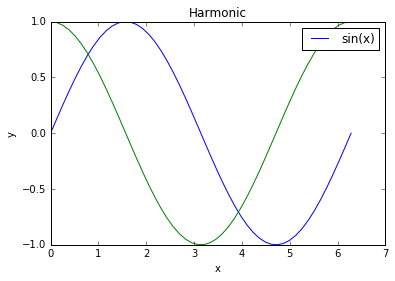

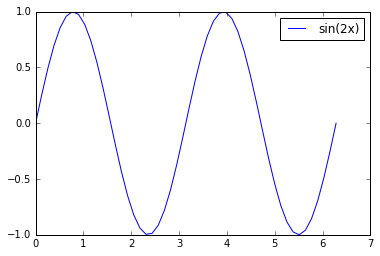

In [7]:
plt.plot(x,y, label='sin(x)')
plt.legend()
plt.title('Harmonic')
plt.xlabel('x')
plt.ylabel('y')

# Add one line to that plot
plt.plot(x, z, label='cos(x)')

# Make a second figure with a simple plot
plt.figure()
plt.plot(x, np.sin(2 * x), label='sin(2x)')
plt.legend()

**Note:** why didn't the "cos(x)" label show up in the legend for the first figure above?

Important commands to know about, and which matplotlib uses internally a lot (these presume you have run, as above, `import matplotlib.pyplot as plt`):

    plt.gcf()  # get current figure
    plt.gca()  # get current axis

Now, let us see how to create the same two plots using the object-oriented interface (the preferred way):

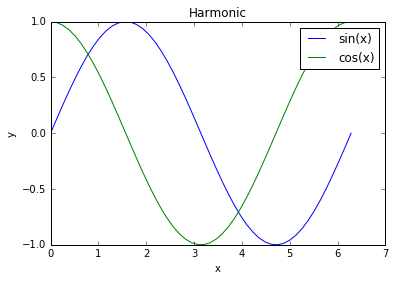

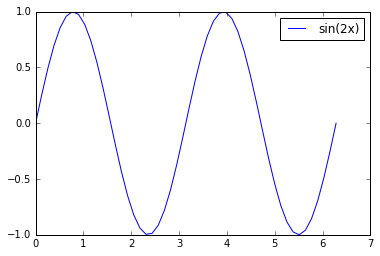

In [8]:
f, ax0 = plt.subplots()         # we manually make a figure and axis
ax0.plot(x, y, label='sin(x)')  # it's the axis who plots
ax0.legend()
ax0.set_title('Harmonic')       # we set the title on the axis
ax0.set_xlabel('x')             # same with labels
ax0.set_ylabel('y')

# Make a second figure with a simple plot.  We can name the figure with a
# different variable name as well as its axes, and then control each
f1, ax1 = plt.subplots()
ax1.plot(x, np.sin(2 * x), label='sin(2x)')
ax1.legend()

# Since we now have variables for each axis, we can add back to the first
# figure even after making the second
ax0.plot(x, np.cos(x), label='cos(x)')
ax0.legend()

Note that these objects (figures, axes, etc.) still exist, even if you use mostly the top-level pyplot calls.

Making subplots
===============

The simplest command is:

    f, ax = plt.subplots()  or  plt.subplots(1, 1)

which is a convenience function that does:

    f = plt.figure()
    ax = f.add_subplot(1, 1, 1)  # (M, N, S) -> in an M x N grid, choose subplot #S

By passing arguments to `subplots`, you can easily create a regular plot grid:

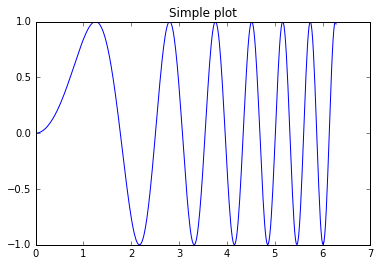

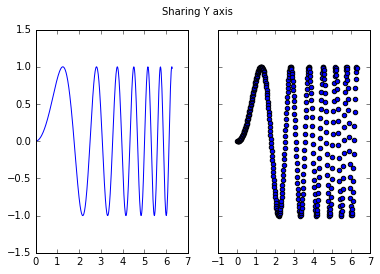

In [9]:
%matplotlib inline

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x**2)

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax2.scatter(x, y)

# Put a figure-level title
f.suptitle('Sharing Y axis')

And finally, an arbitrarily complex grid can be made with ``subplot2grid``:

In [ ]:
f = plt.figure()

# subplot2grid(A, B) -> create a grid of shape A
#                    -> return the axis at position B

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

# Turn off tick labels
for ax in f.axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
# Plot something in the bottom right box
ax3.plot([1, 2, 3])

Manipulating properties across matplotlib
=========================================

In matplotlib, most properties for lines, colors, etc, can be set directly in
the plot call:

In [ ]:
plt.plot([1, 2, 3], linestyle='--', color='r')

But for finer control you can get a hold of the returned line object (more on
these objects later)::

    In [1]: line, = plot([1,2,3])

These line objects have a lot of properties you can control, a full list is
seen here by tab-completing in IPython::

    In [2]: line.set
    line.set                     line.set_drawstyle           line.set_mec
    line.set_aa                  line.set_figure              line.set_mew
    line.set_agg_filter          line.set_fillstyle           line.set_mfc
    line.set_alpha               line.set_gid                 line.set_mfcalt
    line.set_animated            line.set_label               line.set_ms
    line.set_antialiased         line.set_linestyle           line.set_picker
    line.set_axes                line.set_linewidth           line.set_pickradius
    line.set_c                   line.set_lod                 line.set_rasterized
    line.set_clip_box            line.set_ls                  line.set_snap
    line.set_clip_on             line.set_lw                  line.set_solid_capstyle
    line.set_clip_path           line.set_marker              line.set_solid_joinstyle
    line.set_color               line.set_markeredgecolor     line.set_transform
    line.set_contains            line.set_markeredgewidth     line.set_url
    line.set_dash_capstyle       line.set_markerfacecolor     line.set_visible
    line.set_dashes              line.set_markerfacecoloralt  line.set_xdata
    line.set_dash_joinstyle      line.set_markersize          line.set_ydata
    line.set_data                line.set_markevery           line.set_zorder
    

Alternatively, the ``setp`` call (short for set property) can be used to list and set properties::

    In [7]: line, = plot([1,2,3])

    In [8]: plt.setp(line)
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque)         
      animated: [True | False]         
      antialiased or aa: [True | False]
      ...
      ... much more output elided
      ...

    In [9]: plt.setp(line, 'linestyle')
      linestyle: [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''`` ]         and any drawstyle in combination with a linestyle, e.g. ``'steps--'``.         

The ``setp`` command can be used to list properties and their valid values,
making it very easy to discover how to customize your figures to get the visual results
you need.

Furthermore, ``setp`` can manipulate multiple objects at a time:

In [ ]:
x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
y2 = np.sin(2*x)
lines = plt.plot(x, y1, x, y2)

# We will set the width and color of all lines in the figure at once:
plt.setp(lines, linewidth=2, color='r');

Understanding what matplotlib returns: lines, axes and figures
==============================================================

Lines
-----

In a simple plot:

In [ ]:
plt.plot([1,2,3])

The return value of the plot call is a list of lines, which can be manipulated
further.  If you capture the line object (in this case it's a single line so we
use a one-element tuple):

In [ ]:
line, = plt.plot([1,2,3])
line.set_color('r')

One line property that is particularly useful to be aware of is ``set_data``:

In [ ]:
# Create a plot and hold the line object
f, ax = plt.subplots()
line, = ax.plot([1, 2, 3], label='my data')

ax.grid()
ax.set_title('My title')

# ... later, we may want to modify the x/y data but keeping the rest of the
# figure intact, with our new data (think, e.g., animation):
x = np.linspace(0, 1)
y = x**2

# This can be done by operating on the data object itself
line.set_data(x, y)

# Now we must set the axis limits manually. Note that we can also use xlim
# and ylim to set the x/y limits separately.
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

Anatomy of a common plot
========================


Axes are the main object that contains a lot of the user-facing functionality of matplotlib::

    In [16]: f, ax = plt.subplots()

    In [17]: ax.
    Display all 299 possibilities? (y or n)
    ax.acorr                                 ax.hitlist
    ax.add_artist                            ax.hlines
    ax.add_callback                          ax.hold
    ax.add_collection                        ax.ignore_existing_data_limits
    ax.add_line                              ax.images
    ax.add_patch                             ax.imshow
    
    ... etc.

Many of the commands in ``plt.<command>`` are nothing but wrappers around axis
calls, with machinery to automatically create a figure and add an axis to it if
there wasn't one to begin with.  The output of most axis actions that draw
something is a collection of lines (or other more complex geometric objects).

Enclosing it all, the figure
----------------------------

The enclosing object is the ``figure``, that holds all axes:

In [ ]:
f, ax = plt.subplots(2,1)

In [ ]:
f.axes

The basic view of matplotlib is: a figure contains one or more axes, axes draw
and return collections of one or more geometric objects (lines, patches, etc).

For all the gory details on this topic, see the matplotlib [artist tutorial](http://matplotlib.sourceforge.net/users/artists.html).

In [ ]:
ax

In [ ]:
ax[0].figure

<img src="http://www.aosabook.org/images/matplotlib/artists_figure.png">

<img src="http://www.aosabook.org/images/matplotlib/artists_tree.png">

## Summary example

Let's make a simple plot that contains a few commonly used decorations:

In [ ]:
f, ax = plt.subplots(figsize=(10,10))

# Three simple polyniomials
x = np.linspace(-1, 1)
y1, y2, y3 = [x**i for i in [1,2,3]]

# Plot each with a label (for a legend)
ax.plot(x, y1, label='linear')
ax.plot(x, y2, label='cuadratic')
ax.plot(x, y3, label='cubic')
# Make all lines drawn so far thicker
plt.setp(ax.lines, linewidth=2)

# Add a grid and a legend that doesn't overlap the lines
ax.grid()
ax.legend(loc='lower right')

# Add black horizontal and vertical lines through the origin
ax.axhline(0, color='black')
ax.axvline(0, color='black')

# No frame around the axes
ax.set_frame_on(False)

# Set main text elements of the plot
ax.set_title('Some polynomials')
ax.set_xlabel('x')
ax.set_ylabel('p(x)')

Common plot types
=================

Error plots
-----------

First a very simple error plot

In [ ]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2 * np.sqrt(x)
xerr = 0.1 + x / 15

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', ecolor='g')

Logarithmic plots
-----------------

In [ ]:
x = np.linspace(-5, 5)
y = 2 ** x

f, (ax1, ax2) = plt.subplots(2, 1,figsize=(8,8))
ax1.plot(x, y)
ax2.semilogy(x, y)

Bar plots
---------

In [ ]:
N = 5
men_means = (20, 35, 30, 31, 27)
men_std = (2, 3, 4, 1, 2)
women_means = (25, 32, 34, 21, 29)
women_std = (3, 5, 2, 3, 3)

ind = np.arange(N)  # the x locations for the groups
width = 0.35        # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1, rects2), ('Men', 'Women'))

Scatter plots
-------------

The ``scatter`` command produces scatter plots with arbitrary markers.

In [ ]:
from matplotlib import cm    # cm == colormap

t = np.linspace(0.0, 6*np.pi, 100)
y = np.exp(-0.1 * t) * np.cos(t)
phase = t % (2 * np.pi)

f, ax = plt.subplots()
ax.scatter(t, y, s=100 * abs(y), c=phase, cmap=cm.jet)
ax.set_ylim(-1, 1)

ax.grid()
ax.axhline(color='black')

<div class="exercise">
    
Exercise
--------

Consider you have the following data in a text file (The file `data/stations.txt` contains the full dataset):

    # Station  Lat    Long   Elev 
    BIRA    26.4840 87.2670 0.0120
    BUNG    27.8771 85.8909 1.1910
    GAIG    26.8380 86.6318 0.1660
    HILE    27.0482 87.3242 2.0880
    ... etc.
    
    
These are the names of seismographic stations in the Himalaya, with their coordinates and elevations in Kilometers.

1. Use ``np.loadtxt`` to load the data, providing a custom data-type in order to to handle the string column.
    
2. Make a scatter plot of all of these, using both the size and the color to (redundantly) encode elevation.  Label each station by its 4-letter code, and add a colorbar on the right that shows the color-elevation map.
    
3. *Bonus:* If you have the <a href="http://matplotlib.org/basemap/">basemap toolkit</a> installed (`conda install basemap`), repeat the same exercise but draw a grid with parallels and meridians, add rivers in cyan and country boundaries in yellow.  Also, draw the background using the NASA BlueMarble image of Earth.

    
**Tips**
    
* The data-type for a string of length 4 is ``(str, 4)``.
    
* You can check whether you have Basemap installed with:
    
      from mpl_toolkits.basemap import Basemap
    
* For the basemap part, choose a text label color that provides adequate reading contrast over the image background.
    
* Create your Basemap with 'i' resolution, otherwise it will take forever to draw.

Histograms
----------

Matplotlib has a built-in command for histograms.

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))


mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.25)

ax1.set_xlabel('Smarts')
ax1.set_ylabel('Probability')
ax1.set_title('Histogram of IQ')
ax1.text(60, .025, r'$\mu=100,\ \sigma=15$', fontsize=20)
ax1.axis([40, 160, 0, 0.03])
ax1.grid(True)

Aribitrary text and LaTeX support
=================================

In matplotlib, text can be added either relative to an individual axis object
or to the whole figure.

These commands add text to an Axis:

- title() - add a title
- xlabel() - add an axis label to the x-axis
- ylabel() - add an axis label to the y-axis
- text() - add text at an arbitrary location
- annotate() - add an annotation, with optional arrow

And these act on the whole figure:

- figtext() - add text at an arbitrary location
- suptitle() - add a title

And any text field can contain LaTeX expressions for mathematics, as long as
they are enclosed in ``$`` signs.

This example illustrates all of them:

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,9))

fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax1.set_title('axes 1 title')
ax2.set_title('axes 2 title')

ax1.set_xlabel('xlabel 1')
ax2.set_xlabel('xlabel 2')
ax1.set_ylabel('ylabel 1')
ax2.set_ylabel('ylabel 2')

ax1.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax1.text(2, 6, r'an equation: $e^{\i\pi}+1=0$', fontsize=15)

ax1.text(2, 4, u'unicode: Institut f\374r Festk\366rperphysik')

ax1.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='green', fontsize=15)

# Annotating a piece of a plot
ax2.plot([3], [4], 'o')
ax2.annotate('annotate', xy=(3, 4), xytext=(6, 7),
            arrowprops=dict(facecolor='black', width=0.8, 
                            headwidth=7, shrink=0.08))

# Set the axis range to be [0,10] in both directions
for ax in (ax1, ax2):
    ax.axis([0, 10, 0, 10])

Axis sharing
============

The simplest way to share axes is to use the ``subplots`` function.  More
fine-grained control can be obtained by individually adding subplots and adding
share calls to those, but in most cases the functionality from ``subplots`` is sufficient:

In [ ]:
%matplotlib inline

In [ ]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x**2)

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.suptitle('Sharing X axis')
axarr[0].plot(x, y)
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Sharing Y axis')
ax1.plot(x, y)
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
f.suptitle('Sharing both axes')
ax1.plot(x, y)
ax2.scatter(x, y)
ax3.scatter(x, 2*y**2-1,color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

Image display
=============

The ``imshow`` command can display single or multi-channel images.  A simple
array of random numbers, plotted in grayscale:

In [ ]:
z = np.random.random((10, 10))
plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')

In [ ]:
img = plt.imread('data/stained_glass_barcelona.png')

print("Shape:", img.shape)
print()
print(img[:5, :5, 0])

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(img[..., 0], cmap=plt.cm.hot)

<div class="exercise">
    
Exercise
--------

Write a notebook where you can load an image and then perform the following operations on it:
    
1. Create a figure with four plots that show both the full-color image and color channel of the image with the right colormap for that color.  Ensure that the axes are linked so zooming in one image zooms the same region in the others.
    
2. Compute a luminosity and per-channel histogram and display all four histograms in one figure, giving each a separate plot (hint: a 4x1 plot works best for this).  Link the appropriate axes together.
    
3. Create a black-and-white (or more precisely, grayscale) version of the image.  Compare the results from a naive average of all three channels with that of a model that uses 30% red, 59% green and 11% blue, by displaying all three (full color and both grayscales) side by side with linked axes for zooming.
    
Hint: look for the [matplotlib image tutorial](http://matplotlib.org/users/image_tutorial.html).

# Seaborn

https://stanford.edu/~mwaskom/software/seaborn/

*Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.*

"...built on top of matplotlib and tightly integrated with the PyData stack, including support for `numpy` and `pandas` data structures and statistical routines from `scipy` and `statsmodels`."

Some of the features that seaborn offers are

 - Several built-in themes that improve on the default matplotlib aesthetics
 - Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
 - Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
 - Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
 - Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
 - A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
 - High-level abstractions for structuring grids of plots that let you easily build complex visualizations

"The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too."

In [ ]:
from IPython.display import IFrame
IFrame('https://stanford.edu/~mwaskom/software/seaborn/api.html', width=800, height=500)

Set the aesthetic in one go.

In [ ]:
import seaborn as sns
# white, dark, whitegrid, darkgrid, ticks
sns.set(style="darkgrid")

In [ ]:
# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.sample(10)

In [ ]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, size=4,
           scatter_kws={"s": 50, "alpha": 1})

## context sets the scaling of the fonts

choose: paper, notebook, talk, and poster

In [ ]:
sns.set_context("poster")
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, size=4,
           scatter_kws={"s": 50, "alpha": 1})

In [ ]:
sns.axes_style()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("poster")

df = sns.load_dataset("iris")

g = sns.pairplot(df,hue="species")

In [ ]:
import numpy as np; np.random.seed(42)
import seaborn as sns; sns.set(color_codes=True)
x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
ax = sns.tsplot(data=data)

In [ ]:
ax = sns.tsplot(data=data, err_style="boot_traces", n_boot=500)

In [ ]:
ax = sns.tsplot(data=data, ci=[5, 99], color="r")

In [ ]:
type(ax)